In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
dataset = make_blobs(n_samples=10_000, centers=3, random_state=42)
total_samples = dataset[0].shape[0]
r_train, r_cal, r_test = 0.6, 0.2, 0.2
assert r_train + r_cal + r_test == 1
Z_train = dataset[0][: int(total_samples * r_train)]
Z_cal = dataset[0][
    int(total_samples * r_train) : int(total_samples * r_train)
    + int(total_samples * r_cal)
]
Z_test = dataset[0][int(total_samples * r_train) + int(total_samples * r_cal) :]

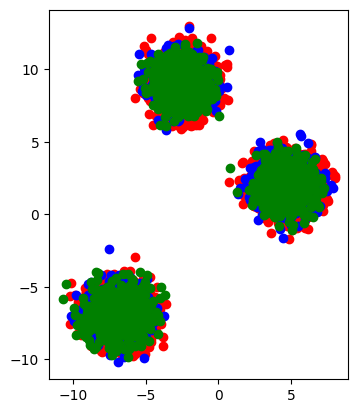

In [4]:
plt.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker="o", label="train")
plt.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker="o", label="cal")
plt.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker="o", label="test")
plt.gca().set_aspect("equal")

In [5]:
from conformal_region_designer.density_estimation import KDE
from conformal_region_designer.clustering import MeanShiftClustering
from conformal_region_designer.shapes import Ellipse
from conformal_region_designer.conformity_optimizer import ConformalRegion

In [6]:
DELTA = 0.95
de = KDE()
cl = MeanShiftClustering()
pcr = ConformalRegion(de, cl, Ellipse, DELTA)

In [7]:
pcr.fit(Z_train)

Generating density points
Fitting Clusters
Fitting Shapes
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=514478, Wed Nov  8 21:07:23 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 6.760219183503638e+01 1.0e+00 9.79e-01  9e-01  1e+00 0:00.0
    2     18 1.208495952951427e+02 1.3e+00 9.38e-01  9e-01  1e+00 0:00.1
    3     27 7.577456205660316e+01 1.5e+00 8.30e-01  7e-01  9e-01 0:00.1
   92    828 9.109160606965377e+00 2.0e+01 2.84e-02  3e-03  3e-02 0:03.1
  100    900 9.108088808923078e+00 2.9e+01 1.65e-02  1e-03  2e-02 0:03.4
  200   1800 9.088435525871516e+00 5.7e+02 2.06e-03  2e-04  2e-03 0:06.7
  300   2700 9.088398803524129e+00 1.9e+04 2.50e-05  3e-06  3e-05 0:09.9
  400   3600 9.088398793206112e+00 1.3e+00 5.56e-07  5e-07  6e-07 0:13.2


/usr/local/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=397)
  warnings.warn(msg + ' (' +


  500   4500 9.088398793131919e+00 1.2e+01 6.83e-07  3e-07  7e-07 0:16.5
  600   5400 9.088398793157308e+00 3.0e+01 5.11e-07  1e-07  3e-07 0:19.8
  615   5535 9.088398793192349e+00 4.3e+01 1.31e-06  3e-07  8e-07 0:20.3
termination on tolstagnation=256 (Wed Nov  8 21:07:43 2023)
final/bestever f-value = 9.088399e+00 9.088399e+00 after 5536/3552 evaluations
incumbent solution: [4.858473315893207, 4.18047549756011, -4.294471968547441, 4.584298775647767, -2.320256246282952, 8.942166779524996]
std deviation: [4.17810525166432e-07, 6.087100017795211e-07, 4.5899123114229807e-07, 4.5305070966691205e-07, 3.3947790528490995e-07, 8.0472653612931e-07]
[array([[42.0472105 ,  0.62357018],
       [ 0.62357018, 38.4921428 ]])]
[array([-2.32025594,  8.94216706])]
Soln time: 20.689626693725586
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=602497, Wed Nov  8 21:07:43 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 4.023869513951569e+01 1.0e+00 9.92e-01

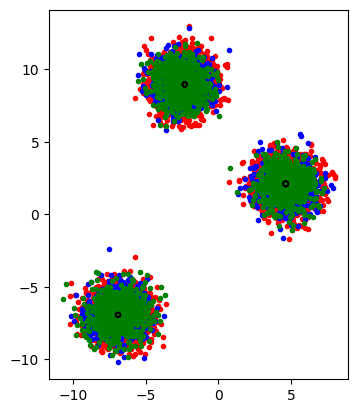

In [8]:
fig, ax = plt.subplots()
ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
ax.set_aspect("equal")
for shape_template in pcr.shapes:
    shape_template.plot(ax)

In [9]:
pcr.conformalize(Z_cal)

Target score: 0.3718909348074224


In [10]:
scores = pcr.calculate_scores(Z_test)
coverage = np.sum(scores < 0) / len(scores)
print("Test Coverage: ", coverage)
scores = pcr.calculate_scores(Z_cal)
coverage = np.sum(scores < 0) / len(scores)
print("Calibration Coverage: ", coverage)


Test Coverage:  0.9525
Calibration Coverage:  0.9495


(array([358., 832., 526., 173.,  55.,  33.,   9.,   5.,   5.,   4.]),
 array([-2.11597119e-03, -1.59834149e-03, -1.08071178e-03, -5.63082073e-04,
        -4.54523666e-05,  4.72177340e-04,  9.89807047e-04,  1.50743675e-03,
         2.02506646e-03,  2.54269617e-03,  3.06032587e-03]),
 <BarContainer object of 10 artists>)

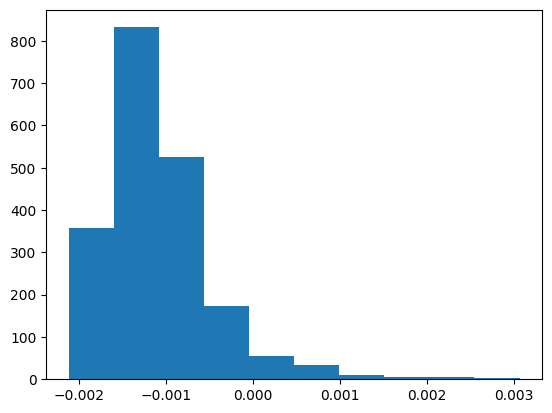

In [11]:
plt.hist(scores)

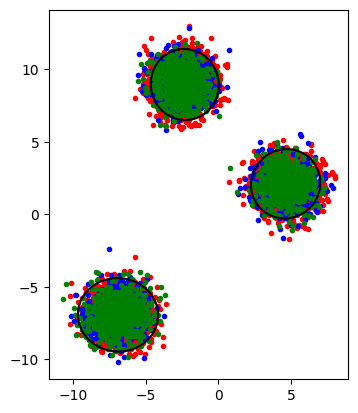

In [12]:
fig, ax = plt.subplots()
ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
ax.set_aspect("equal")
for shape_template in pcr.shapes:
    shape_template.plot(ax)

In [13]:
from conformal_region_designer.utils import conformalized_quantile
target_quantile = conformalized_quantile(len(Z_train), DELTA)
print(target_quantile)

0.9501583333333333
